<a href="https://colab.research.google.com/github/SandroSidney/Python/blob/main/Aula_06_DDS_T5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [3]:
caminho = '/content/datahackers-survey-2019-anonymous-responses.csv'
dados = pd.read_csv(caminho)
dados.head()

,"('P0', 'id')","('P1', 'age')","('P2', 'gender')","('P3', 'living_in_brasil')","('P5', 'living_state')","('P6', 'born_or_graduated')","('P8', 'degreee_level')","('P10', 'job_situation')","('P12', 'workers_number')","('P13', 'manager')","('P16', 'salary_range')","('P17', 'time_experience_data_science')","('P18', 'time_experience_before')","('P19', 'is_data_science_professional')","('P20', 'linear_regression')","('P20', 'logistic_regression')","('P20', 'glms')","('P20', 'decision_tree')","('P20', 'random_forest')","('P20', 'neural_networks')","('P20', 'bayesian_inference')","('P20', 'ensemble')","('P20', 'svms')","('P20', 'cnns')","('P20', 'rnns')","('P20', 'hmms')","('P20', 'gans')","('P20', 'markov_chains')","('P20', 'nlp')","('P20', 'gradient_boosted_machines')","('P20', 'cluster_analysis')","('P20', 'survival_analysis')","('P20', 'longitudinal_data_analysis')","('P20', 'joint analysis')","('P20', 'no_listed_methods')","('P21', 'sql_')","('P21', 'r')","('P21', 'python')","('P21', 'c_c++_c#')","('P21', 'dotnet')",...,"('P30', 'microsoft_azure')","('P30', 'do_not_know')","('P30', 'other')","('P31', 'data_hackers_blog')","('P31', 'data_hackers_podcast')","('P31', 'weekly_newsletter')","('P31', 'slack_channel')","('P31', 'data_hackers_bootcamp')","('P31', 'do_not_know_data_hackers')","('P32', 'prefered_data_hackers_initiative')","('P33', 'telegram_groups')","('P33', 'whatsapp_groups')","('P33', 'youtube_channels')","('P33', 'other_brasilian_blogs')","('P33', 'other_slack_channels')","('P33', 'twitter')","('P33', 'abroad_blogs')","('P33', 'abroad_podcasts')","('P33', 'meetups_and_events')","('P33', 'only_data_hackers')","('P33', 'other')","('P34', 'udacity')","('P34', 'coursera')","('P34', 'udemy')","('P34', 'height')","('P34', 'edx')","('P34', 'data_camp')","('P34', 'data_quest')","('P34', 'kaggle_learn')","('P34', 'online_courses')","('P34', 'other')","('P35', 'data_science_plataforms_preference')","('P35', 'other')","('P36', 'draw_participation')","('D1', 'living_macroregion')","('D2', 'origin_macroregion')","('D3', 'anonymized_degree_area')","('D4', 'anonymized_market_sector')","('D5', 'anonymized_manager_level')","('D6', 'anonymized_role')"
0,v9otv8j9wdvjrv9otvwnn9owhzq54ktv,37.0,Masculino,1,Minas Gerais (MG),1.0,Estudante de Graduação,Empregado (CTL),de 1 a 5,0.0,de R$ 1.001/mês a R$ 2.000/mês,Não tenho experiência na área de dados,Não tive experiência na área de TI/Engenharia ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Ainda não conhecia o Data Hackers,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,Nunca fiz cursos online,NaN,1.0,Região Sudeste,NaN,Computação / Engenharia de Software / Sistemas...,Outras,NaN,Outras
1,875ul998t0hqcv0871uptwf3oswcfv35,24.0,Feminino,1,São Paulo (SP),1.0,Estudante de Graduação,Empregado (CTL),Acima de 3000,0.0,de R$ 2.001/mês a R$ 3000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,Ainda não conhecia o Data Hackers,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,NaN,Data Science Academy,0.0,Região Sudeste,NaN,Computação / Engenharia de Software / Sistemas...,Educação,NaN,Data Analyst/Analista de Dados
2,puscuk079vw1pusbb900pzw2xvpxtgdk,26.0,Masculino,1,São Paulo (SP),1.0,Graduação/Bacharelado,Empregado (CTL),Acima de 3000,0.0,de R$ 4.001/mês a R$ 6.000/mês,de 1 a 2 anos,de 6 a 10 anos,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,Newsletter Semanal,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,Udemy,NaN,1.0,Região Sudeste,NaN,Outras Engenharias,Indústria (Manufatura),NaN,Outras
3,rmel8ewqpbffp2mnfbzermel8eqincov,21.0,Masculino,1,São Paulo (SP),0.0,Estudante de Graduação,Estagiário,de 11 a 50,0.0,de R$ 1.001/mês a R$ 2.000/mês,Menos de 1 ano,de 2 a 3 anos,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,Ainda não conhecia o Data Hackers,0,1,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,Alura,NaN,1.0,Região Sudeste,Região Sudeste,

In [12]:
dados.isnull().mean()[dados.isnull().sum() != 0 ].sort_values()

('P2', 'gender')                                 0.001700
('P36', 'draw_participation')                    0.002266
('P1', 'age')                                    0.013598
('P6', 'born_or_graduated')                      0.019263
('D3', 'anonymized_degree_area')                 0.019830
('P35', 'data_science_plataforms_preference')    0.079320
('P12', 'workers_number')                        0.134844
('P13', 'manager')                               0.134844
('P16', 'salary_range')                          0.134844
('D4', 'anonymized_market_sector')               0.137677
('P5', 'living_state')                           0.190935
('D1', 'living_macroregion')                     0.190935
('D6', 'anonymized_role')                        0.291218
('P22', 'most_used_proggraming_languages')       0.486686
('P29', 'have_data_warehouse')                   0.550708
('D2', 'origin_macroregion')                     0.815864
('D5', 'anonymized_manager_level')               0.827195
('P35', 'other

In [14]:
dados["('D6', 'anonymized_role')"].value_counts()

Desenvolvedor ou Engenheiro de Software    225
Outras                                     220
Data Scientist/Cientista de Dados          167
Data Analyst/Analista de Dados             163
Business Intelligence/Analista de BI       150
Data Engineer/Engenheiro de Dados          130
Business Analyst/Analista de Negócios       72
Analista de Inteligência de Mercado         29
Engenheiro                                  26
Analista de Marketing                       19
Engenheiro de Machine Learning              15
DBA/Administrador de Banco de Dados         14
Estatístico                                 11
Economista                                  10
Name: ('D6', 'anonymized_role'), dtype: int64

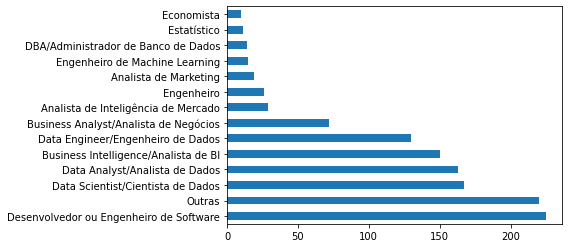

In [16]:
dados["('D6', 'anonymized_role')"].value_counts().plot(kind = 'barh')

In [18]:
profmap = {'Desenvolvedor ou Engenheiro de Software': 'Desenvolvedor/Engenheiro de Software', 
                                            'Outras': 'Outras',
                 'Data Scientist/Cientista de Dados': 'Cientista de Dados',
                    'Data Analyst/Analista de Dados': 'Analista de Dados',
              'Business Intelligence/Analista de BI': 'Analista de BI',
                 'Data Engineer/Engenheiro de Dados': 'Engenheiro de Dados',
             'Business Analyst/Analista de Negócios': 'Analista de BI',
               'Analista de Inteligência de Mercado': 'Analista de BI',
                                        'Engenheiro': 'Outras',
                             'Analista de Marketing': 'Outras',
                    'Engenheiro de Machine Learning': 'Cientista de Dados',
               'DBA/Administrador de Banco de Dados': 'Engenheiro de Dados',
                                       'Estatístico': 'Cientista de Dados',
                                        'Economista': 'Outras'}

           
dados['profissao'] = dados["('D6', 'anonymized_role')"].map(profmap)


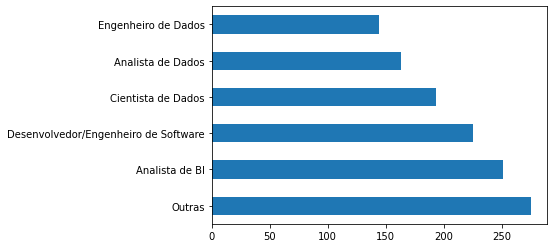

In [19]:
dados['profissao'].value_counts().plot(kind = 'barh')

In [20]:
# Pré-processamento básico

# criando variáveis mais convenientes

# empresa
tammap = { 'de 1 a 5': 'Pequena',
           'de 6 a 10': 'Pequena',
           'de 11 a 50': 'Pequena',
           'de 51 a 100': 'Pequena',
           'de 101 a 500': 'Média',
           'de 501 a 1000': 'Média',
           'de 1001 a 3000': 'Grande',
           'Acima de 3000': 'Grande'}

 
# salarios
salamap = {    'Menos de R$ 1.000/mês': 1000,
      'de R$ 1.001/mês a R$ 2.000/mês': 1500, 
       'de R$ 2.001/mês a R$ 3000/mês': 2500,
      'de R$ 3.001/mês a R$ 4.000/mês': 3500,
      'de R$ 4.001/mês a R$ 6.000/mês': 5000, 
      'de R$ 6.001/mês a R$ 8.000/mês': 7000,
     'de R$ 8.001/mês a R$ 12.000/mês': 10000,
    'de R$ 12.001/mês a R$ 16.000/mês': 14000,
    'de R$ 16.001/mês a R$ 20.000/mês': 18000,
    'de R$ 20.001/mês a R$ 25.000/mês': 22500, 
              'Acima de R$ 25.001/mês': 25000}

# discretização da idade (escolha arbitraria dos cortes)
cortes = [0, 24, 30, 40, 100]
nomes = ['[18,24]', '[25,30]', '[31,40]', '[41,50]']

# criando um novo dataset com as informações de maior interesse 

dados['idade'] = pd.cut(dados["('P1', 'age')"], bins = cortes, labels = nomes)

dados['salario'] = dados["('P16', 'salary_range')"].map(salamap)  
dados['tamanho_da_empresa'] = dados["('P12', 'workers_number')"].map(tammap) 

dados['gestor'] = dados["('P13', 'manager')"].map({0: 'não', 1: 'sim'})
dados['se_considera_ds'] = dados["('P19', 'is_data_science_professional')"].map({0: 'não', 1: 'sim'})

dados['sexo'] = dados["('P2', 'gender')"]
dados['experiencia_ds'] = dados["('P17', 'time_experience_data_science')"]
dados['tipo_de_trabalho'] = dados["('P10', 'job_situation')"]
dados['escolaridade'] = dados["('P8', 'degreee_level')"]
dados['area_de_formacao'] = dados["('D3', 'anonymized_degree_area')"]
dados['setor_de_mercado'] = dados["('D4', 'anonymized_market_sector')"]
dados['plataforma_favorita'] = dados["('P35', 'data_science_plataforms_preference')"] 
dados.head()

,"('P0', 'id')","('P1', 'age')","('P2', 'gender')","('P3', 'living_in_brasil')","('P5', 'living_state')","('P6', 'born_or_graduated')","('P8', 'degreee_level')","('P10', 'job_situation')","('P12', 'workers_number')","('P13', 'manager')","('P16', 'salary_range')","('P17', 'time_experience_data_science')","('P18', 'time_experience_before')","('P19', 'is_data_science_professional')","('P20', 'linear_regression')","('P20', 'logistic_regression')","('P20', 'glms')","('P20', 'decision_tree')","('P20', 'random_forest')","('P20', 'neural_networks')","('P20', 'bayesian_inference')","('P20', 'ensemble')","('P20', 'svms')","('P20', 'cnns')","('P20', 'rnns')","('P20', 'hmms')","('P20', 'gans')","('P20', 'markov_chains')","('P20', 'nlp')","('P20', 'gradient_boosted_machines')","('P20', 'cluster_analysis')","('P20', 'survival_analysis')","('P20', 'longitudinal_data_analysis')","('P20', 'joint analysis')","('P20', 'no_listed_methods')","('P21', 'sql_')","('P21', 'r')","('P21', 'python')","('P21', 'c_c++_c#')","('P21', 'dotnet')",...,"('P33', 'other_brasilian_blogs')","('P33', 'other_slack_channels')","('P33', 'twitter')","('P33', 'abroad_blogs')","('P33', 'abroad_podcasts')","('P33', 'meetups_and_events')","('P33', 'only_data_hackers')","('P33', 'other')","('P34', 'udacity')","('P34', 'coursera')","('P34', 'udemy')","('P34', 'height')","('P34', 'edx')","('P34', 'data_camp')","('P34', 'data_quest')","('P34', 'kaggle_learn')","('P34', 'online_courses')","('P34', 'other')","('P35', 'data_science_plataforms_preference')","('P35', 'other')","('P36', 'draw_participation')","('D1', 'living_macroregion')","('D2', 'origin_macroregion')","('D3', 'anonymized_degree_area')","('D4', 'anonymized_market_sector')","('D5', 'anonymized_manager_level')","('D6', 'anonymized_role')",profissao,idade,salario,tamanho_da_empresa,gestor,se_considera_ds,sexo,experiencia_ds,tipo_de_trabalho,escolaridade,area_de_formacao,setor_de_mercado,plataforma_favorita
0,v9otv8j9wdvjrv9otvwnn9owhzq54ktv,37.0,Masculino,1,Minas Gerais (MG),1.0,Estudante de Graduação,Empregado (CTL),de 1 a 5,0.0,de R$ 1.001/mês a R$ 2.000/mês,Não tenho experiência na área de dados,Não tive experiência na área de TI/Engenharia ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,Nunca fiz cursos online,NaN,1.0,Região Sudeste,NaN,Computação / Engenharia de Software / Sistemas...,Outras,NaN,Outras,Outras,"[31,40]",1500.0,Pequena,não,não,Masculino,Não tenho experiência na área de dados,Empregado (CTL),Estudante de Graduação,Computação / Engenharia de Software / Sistemas...,Outras,Nunca fiz cursos online
1,875ul998t0hqcv0871uptwf3oswcfv35,24.0,Feminino,1,São Paulo (SP),1.0,Estudante de Graduação,Empregado (CTL),Acima de 3000,0.0,de R$ 2.001/mês a R$ 3000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,NaN,Data Science Academy,0.0,Região Sudeste,NaN,Computação / Engenharia de Software / Sistemas...,Educação,NaN,Data Analyst/Analista de Dados,Analista de Dados,"[18,24]",2500.0,Grande,não,sim,Feminino,Menos de 1 ano,Empregado (CTL),Estudante de Graduação,Computação / Engenharia de Software / Sistemas...,Educação,NaN
2,puscuk079vw1pusbb900pzw2xvpxtgdk,26.0,Masculino,1,São Paulo (SP),1.0,Graduação/Bacharelado,Empregado (CTL),Acima de 3000,0.0,de R$ 4.001/mês a R$ 6.000/mês,de 1 a 2 anos,de 6 a 10 anos,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,Udemy,NaN,1.0,Região Sudeste,NaN,Outras Engenharias,Indústria (Manufatura),NaN,Outras,Outras,"[25,30]",5000.0,Grande,não,sim,Masculino,de 1 a 2 anos,Empregado (CTL),Graduação/Bacharelado,Outras Engenharias,Indústria (Manufatura),Udemy
3,rmel8ewqpbffp2mnfbzermel8eqincov,21.0,Masculino,1,São Paulo (SP),0.0,Estudante de Graduação,Estagiário,de 11 a 50,0.0,de R$ 1.001/mês a R$ 2.000/mês,Menos de 1 ano,de 2 a 3 anos,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,

In [22]:
dados.head()

,"('P0', 'id')","('P1', 'age')","('P2', 'gender')","('P3', 'living_in_brasil')","('P5', 'living_state')","('P6', 'born_or_graduated')","('P8', 'degreee_level')","('P10', 'job_situation')","('P12', 'workers_number')","('P13', 'manager')","('P16', 'salary_range')","('P17', 'time_experience_data_science')","('P18', 'time_experience_before')","('P19', 'is_data_science_professional')","('P20', 'linear_regression')","('P20', 'logistic_regression')","('P20', 'glms')","('P20', 'decision_tree')","('P20', 'random_forest')","('P20', 'neural_networks')","('P20', 'bayesian_inference')","('P20', 'ensemble')","('P20', 'svms')","('P20', 'cnns')","('P20', 'rnns')","('P20', 'hmms')","('P20', 'gans')","('P20', 'markov_chains')","('P20', 'nlp')","('P20', 'gradient_boosted_machines')","('P20', 'cluster_analysis')","('P20', 'survival_analysis')","('P20', 'longitudinal_data_analysis')","('P20', 'joint analysis')","('P20', 'no_listed_methods')","('P21', 'sql_')","('P21', 'r')","('P21', 'python')","('P21', 'c_c++_c#')","('P21', 'dotnet')",...,"('P33', 'other_brasilian_blogs')","('P33', 'other_slack_channels')","('P33', 'twitter')","('P33', 'abroad_blogs')","('P33', 'abroad_podcasts')","('P33', 'meetups_and_events')","('P33', 'only_data_hackers')","('P33', 'other')","('P34', 'udacity')","('P34', 'coursera')","('P34', 'udemy')","('P34', 'height')","('P34', 'edx')","('P34', 'data_camp')","('P34', 'data_quest')","('P34', 'kaggle_learn')","('P34', 'online_courses')","('P34', 'other')","('P35', 'data_science_plataforms_preference')","('P35', 'other')","('P36', 'draw_participation')","('D1', 'living_macroregion')","('D2', 'origin_macroregion')","('D3', 'anonymized_degree_area')","('D4', 'anonymized_market_sector')","('D5', 'anonymized_manager_level')","('D6', 'anonymized_role')",profissao,idade,salario,tamanho_da_empresa,gestor,se_considera_ds,sexo,experiencia_ds,tipo_de_trabalho,escolaridade,area_de_formacao,setor_de_mercado,plataforma_favorita
0,v9otv8j9wdvjrv9otvwnn9owhzq54ktv,37.0,Masculino,1,Minas Gerais (MG),1.0,Estudante de Graduação,Empregado (CTL),de 1 a 5,0.0,de R$ 1.001/mês a R$ 2.000/mês,Não tenho experiência na área de dados,Não tive experiência na área de TI/Engenharia ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,Nunca fiz cursos online,NaN,1.0,Região Sudeste,NaN,Computação / Engenharia de Software / Sistemas...,Outras,NaN,Outras,Outras,"[31,40]",1500.0,Pequena,não,não,Masculino,Não tenho experiência na área de dados,Empregado (CTL),Estudante de Graduação,Computação / Engenharia de Software / Sistemas...,Outras,Nunca fiz cursos online
1,875ul998t0hqcv0871uptwf3oswcfv35,24.0,Feminino,1,São Paulo (SP),1.0,Estudante de Graduação,Empregado (CTL),Acima de 3000,0.0,de R$ 2.001/mês a R$ 3000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,NaN,Data Science Academy,0.0,Região Sudeste,NaN,Computação / Engenharia de Software / Sistemas...,Educação,NaN,Data Analyst/Analista de Dados,Analista de Dados,"[18,24]",2500.0,Grande,não,sim,Feminino,Menos de 1 ano,Empregado (CTL),Estudante de Graduação,Computação / Engenharia de Software / Sistemas...,Educação,NaN
2,puscuk079vw1pusbb900pzw2xvpxtgdk,26.0,Masculino,1,São Paulo (SP),1.0,Graduação/Bacharelado,Empregado (CTL),Acima de 3000,0.0,de R$ 4.001/mês a R$ 6.000/mês,de 1 a 2 anos,de 6 a 10 anos,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,Udemy,NaN,1.0,Região Sudeste,NaN,Outras Engenharias,Indústria (Manufatura),NaN,Outras,Outras,"[25,30]",5000.0,Grande,não,sim,Masculino,de 1 a 2 anos,Empregado (CTL),Graduação/Bacharelado,Outras Engenharias,Indústria (Manufatura),Udemy
3,rmel8ewqpbffp2mnfbzermel8eqincov,21.0,Masculino,1,São Paulo (SP),0.0,Estudante de Graduação,Estagiário,de 11 a 50,0.0,de R$ 1.001/mês a R$ 2.000/mês,Menos de 1 ano,de 2 a 3 anos,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,

In [23]:
dados.columns[0]

"('P0', 'id')"

In [24]:
dados['idade']

0       [31,40]
1       [18,24]
2       [25,30]
3       [18,24]
4       [25,30]
         ...   
1760    [18,24]
1761    [31,40]
1762    [31,40]
1763    [25,30]
1764    [18,24]
Name: idade, Length: 1765, dtype: category
Categories (4, object): ['[18,24]' < '[25,30]' < '[31,40]' < '[41,50]']

In [25]:
dados["('P1', 'age')"]

0       37.0
1       24.0
2       26.0
3       21.0
4       27.0
        ... 
1760    23.0
1761    39.0
1762    36.0
1763    29.0
1764    22.0
Name: ('P1', 'age'), Length: 1765, dtype: float64

In [27]:
dados['idade'].value_counts()

[25,30]    650
[31,40]    559
[18,24]    399
[41,50]    133
Name: idade, dtype: int64

In [28]:
# profissional de dados geral
dados['salario'].value_counts()

5000.0     308
10000.0    237
7000.0     229
3500.0     219
1500.0     181
2500.0     150
14000.0     82
1000.0      48
18000.0     45
22500.0     15
25000.0     13
Name: salario, dtype: int64

In [29]:
# profissional de dados geral
dados['salario'].mean()

6283.235101506221

In [30]:
dados['profissao'] == "Cientista de Dados"

0       False
1       False
2       False
3       False
4       False
        ...  
1760    False
1761    False
1762    False
1763    False
1764     True
Name: profissao, Length: 1765, dtype: bool

In [33]:
dados[ dados['profissao'] == "Cientista de Dados"]

,"('P0', 'id')","('P1', 'age')","('P2', 'gender')","('P3', 'living_in_brasil')","('P5', 'living_state')","('P6', 'born_or_graduated')","('P8', 'degreee_level')","('P10', 'job_situation')","('P12', 'workers_number')","('P13', 'manager')","('P16', 'salary_range')","('P17', 'time_experience_data_science')","('P18', 'time_experience_before')","('P19', 'is_data_science_professional')","('P20', 'linear_regression')","('P20', 'logistic_regression')","('P20', 'glms')","('P20', 'decision_tree')","('P20', 'random_forest')","('P20', 'neural_networks')","('P20', 'bayesian_inference')","('P20', 'ensemble')","('P20', 'svms')","('P20', 'cnns')","('P20', 'rnns')","('P20', 'hmms')","('P20', 'gans')","('P20', 'markov_chains')","('P20', 'nlp')","('P20', 'gradient_boosted_machines')","('P20', 'cluster_analysis')","('P20', 'survival_analysis')","('P20', 'longitudinal_data_analysis')","('P20', 'joint analysis')","('P20', 'no_listed_methods')","('P21', 'sql_')","('P21', 'r')","('P21', 'python')","('P21', 'c_c++_c#')","('P21', 'dotnet')",...,"('P33', 'other_brasilian_blogs')","('P33', 'other_slack_channels')","('P33', 'twitter')","('P33', 'abroad_blogs')","('P33', 'abroad_podcasts')","('P33', 'meetups_and_events')","('P33', 'only_data_hackers')","('P33', 'other')","('P34', 'udacity')","('P34', 'coursera')","('P34', 'udemy')","('P34', 'height')","('P34', 'edx')","('P34', 'data_camp')","('P34', 'data_quest')","('P34', 'kaggle_learn')","('P34', 'online_courses')","('P34', 'other')","('P35', 'data_science_plataforms_preference')","('P35', 'other')","('P36', 'draw_participation')","('D1', 'living_macroregion')","('D2', 'origin_macroregion')","('D3', 'anonymized_degree_area')","('D4', 'anonymized_market_sector')","('D5', 'anonymized_manager_level')","('D6', 'anonymized_role')",profissao,idade,salario,tamanho_da_empresa,gestor,se_considera_ds,sexo,experiencia_ds,tipo_de_trabalho,escolaridade,area_de_formacao,setor_de_mercado,plataforma_favorita
9,4t388yqrekd1gsq4t388b9gqkmt2z86x,28.0,Masculino,1,São Paulo (SP),1.0,Mestrado,Empregado (CTL),Acima de 3000,0.0,de R$ 8.001/mês a R$ 12.000/mês,de 2 a 3 anos,de 6 a 10 anos,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,Udemy,NaN,1.0,Região Sudeste,NaN,Computação / Engenharia de Software / Sistemas...,Área da Saúde,NaN,Data Scientist/Cientista de Dados,Cientista de Dados,"[25,30]",10000.0,Grande,não,sim,Masculino,de 2 a 3 anos,Empregado (CTL),Mestrado,Computação / Engenharia de Software / Sistemas...,Área da Saúde,Udemy
14,bhacmlt12qr71dgbhacmltqzti96uw3e,26.0,Feminino,1,São Paulo (SP),0.0,Graduação/Bacharelado,Empregado (CTL),de 11 a 50,0.0,de R$ 3.001/mês a R$ 4.000/mês,Menos de 1 ano,Menos de 1 ano,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,Udemy,NaN,1.0,Região Sudeste,Região Nordeste,Computação / Engenharia de Software / Sistemas...,Tecnologia/Fábrica de Software,NaN,Data Scientist/Cientista de Dados,Cientista de Dados,"[25,30]",3500.0,Pequena,não,sim,Feminino,Menos de 1 ano,Empregado (CTL),Graduação/Bacharelado,Computação / Engenharia de Software / Sistemas...,Tecnologia/Fábrica de Software,Udemy
20,hgfcakywa7c5hgfcv0vyvmdno3a4irtw,23.0,Masculino,1,São Paulo (SP),0.0,Estudante de Graduação,Estagiário,Acima de 3000,0.0,de R$ 2.001/mês a R$ 3000/mês,Não tenho experiência na área de dados,Não tive experiência na área de TI/Engenharia ...,1,1,1,1,1,0,1,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,1,1,1,1,0,0,0,0,1,0,0,Udemy,NaN,1.0,Região Sudeste,Região Nordeste,Outras Engenharias,Varejo,NaN,Data Scientist/Cientista de Dados,Cientista de Dados,"[18,24]",2500.0,Grande,não,sim,Masculino,Não tenho experiência na área de dados,Estagiário,Estudante de Graduação,Outras Engenharias,Varejo,Udemy
36,15kmtpwmxk32d0d0adorubc15kmtpwvj,25.0,Masculino,1,São Paulo (SP),1.0,Graduação/Bacharelado,Empregado (CTL),Acima de 3000,0.0,de R$ 4.001/mês a R$ 6.000/mês,de 2 a 3 anos,Não tive experiência na área de TI/Engenharia ..

In [35]:
dados[ dados['profissao'] == "Cientista de Dados"]['salario'].mean()

6831.606217616581

In [36]:
round(dados[ dados['profissao'] == "Engenheiro de Dados"]['salario'].mean(), 2)

7802.08

In [ ]:
round(dados[ dados['profissao'] == "Engenheiro de Dados"]['salario'].mean(), 2)

In [39]:
# Retorna o salario medio por profissao utilizando a Group By

round(dados.groupby('profissao')['salario'].mean(),2)

profissao
Analista de BI                          4978.09
Analista de Dados                       5036.81
Cientista de Dados                      6831.61
Desenvolvedor/Engenheiro de Software    5133.33
Engenheiro de Dados                     7802.08
Outras                                  4854.55
Name: salario, dtype: float64

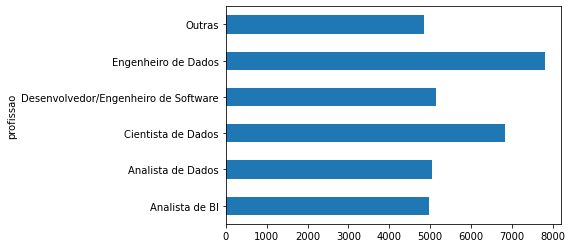

In [41]:
# Retonar em grafico a media salarial por profissão arredondando em duas casas decimais.

dados.groupby('profissao')['salario'].mean().round(2).plot(kind = 'barh')

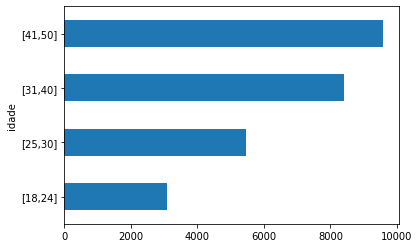

In [42]:
# Retonar em grafico a media salarial por idade arredondando em duas casas decimais.

dados.groupby('idade')['salario'].mean().round(2).plot(kind = 'barh')

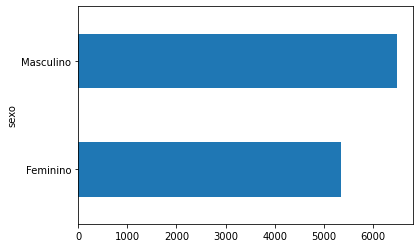

In [43]:
# Retonar em grafico a media salarial por sexo arredondando em duas casas decimais.

dados.groupby('sexo')['salario'].mean().round(2).plot(kind = 'barh')

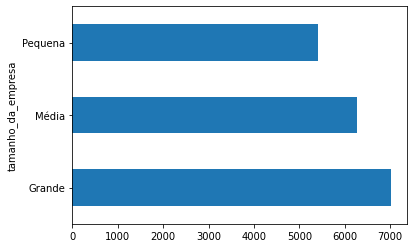

In [45]:
# Retonar em grafico a media salarial por idade arredondando em duas casas decimais.

dados.groupby('tamanho_da_empresa')['salario'].mean().round(2).plot(kind = 'barh')

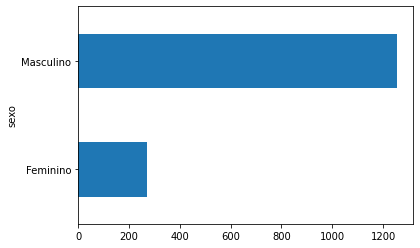

In [46]:
# Retonar em grafico a media salarial por idade arredondando em duas casas decimais.

dados.groupby('sexo')['salario'].count().round(2).plot(kind = 'barh')

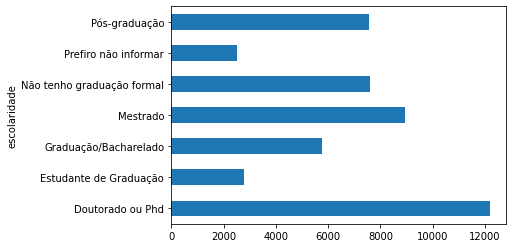

In [47]:
# Retonar em grafico a media salarial por escolaridade arredondando em duas casas decimais.

dados.groupby('escolaridade')['salario'].mean().round(2).plot(kind = 'barh')

In [48]:
# Retonar em grafico a media salarial por idade arredondando em duas casas decimais.

x = dados.groupby('sexo')['salario'].mean().round(2)

In [49]:
1 - x[0]/x[1]

0.17676305458489716

In [50]:
x

sexo
Feminino     5343.17
Masculino    6490.44
Name: salario, dtype: float64

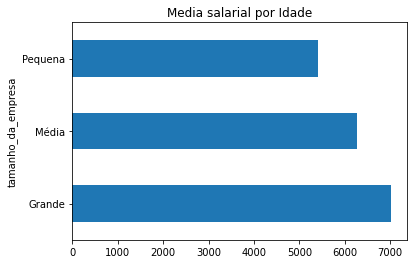

In [52]:
# Retonar em grafico a media salarial por idade arredondando em duas casas decimais.

titulo = 'Media salarial por Idade'
dados.groupby('tamanho_da_empresa')['salario'].mean().round(2).plot(kind = 'barh', title = titulo)

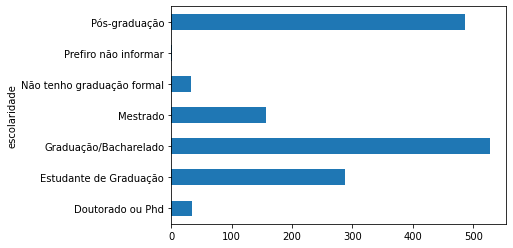

In [54]:
# Retonar em grafico a media salarial por escolaridade arredondando em duas casas decimais.

dados.groupby('escolaridade')['salario'].count().round(2).plot(kind = 'barh')

In [57]:
# Retonar em grafico a media salarial por Sexo Tamanho da Empresa arredondando em duas casas decimais.

dados.groupby(['sexo','tamanho_da_empresa'])['salario'].mean().unstack().round(2) #.plot(kind = 'barh')

tamanho_da_empresa,Grande,Média,Pequena
sexo,,,
Feminino,6145.83,5642.86,3961.04
Masculino,7214.13,6416.46,5710.05


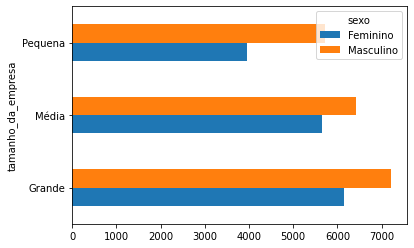

In [59]:
# Retonar em grafico a media salarial por Sexo Tamanho da Empresa arredondando em duas casas decimais.

dados.groupby(['sexo','tamanho_da_empresa'])['salario'].mean().unstack().round(2).T.plot(kind = 'barh')

In [ ]:
# Retonar em grafico a media salarial por Sexo Tamanho da Empresa arredondando em duas casas decimais.

dados.groupby(['sexo','tamanho_da_empresa'])['salario'].mean().unstack().round(2).T.plot(kind = 'barh')

In [60]:
# Retonar em grafico a media salarial por Sexo Tamanho da Empresa arredondando em duas casas decimais.

dados.groupby(['sexo','tamanho_da_empresa']).mean() # ['salario'].mean().unstack().round(2).T.plot(kind = 'barh')

('P1', 'age')  ...      salario
sexo      tamanho_da_empresa                 ...             
Feminino  Grande                  30.043478  ...  6145.833333
          Média                   28.489796  ...  5642.857143
          Pequena                 28.945946  ...  3961.038961
Masculino Grande                  30.734783  ...  7214.130435
          Média                   29.632754  ...  6416.461916
          Pequena                 29.798942  ...  5710.051546

[6 rows x 152 columns]

In [61]:
# Retonar em grafico a media salarial por Sexo Tamanho da Empresa arredondando em duas casas decimais.

dados.groupby(['sexo','tamanho_da_empresa']).mean()[['salario', "('P1', 'age')"]] # ['salario'].mean().unstack().round(2).T.plot(kind = 'barh')

salario  ('P1', 'age')
sexo      tamanho_da_empresa                            
Feminino  Grande              6145.833333      30.043478
          Média               5642.857143      28.489796
          Pequena             3961.038961      28.945946
Masculino Grande              7214.130435      30.734783
          Média               6416.461916      29.632754
          Pequena             5710.051546      29.798942

In [63]:
# Retonar em grafico a media salarial por Sexo Tamanho da Empresa arredondando em duas casas decimais.

dados.filter(regex = 'P20').sum()

('P20', 'linear_regression')             524
('P20', 'logistic_regression')           406
('P20', 'glms')                          134
('P20', 'decision_tree')                 441
('P20', 'random_forest')                 359
('P20', 'neural_networks')               267
('P20', 'bayesian_inference')            224
('P20', 'ensemble')                      169
('P20', 'svms')                          180
('P20', 'cnns')                          101
('P20', 'rnns')                           98
('P20', 'hmms')                           18
('P20', 'gans')                           24
('P20', 'markov_chains')                  79
('P20', 'nlp')                           252
('P20', 'gradient_boosted_machines')     177
('P20', 'cluster_analysis')              368
('P20', 'survival_analysis')              72
('P20', 'longitudinal_data_analysis')    101
('P20', 'joint analysis')                 79
('P20', 'no_listed_methods')             192
dtype: int64

In [64]:
cds = dados[ dados['profissao'] == "Engenheiro de Dados"]

In [65]:
cds.filter(regex= 'P20').mean().sort_values(ascending = False)

('P20', 'no_listed_methods')             0.291667
('P20', 'linear_regression')             0.270833
('P20', 'decision_tree')                 0.180556
('P20', 'nlp')                           0.159722
('P20', 'random_forest')                 0.159722
('P20', 'cluster_analysis')              0.145833
('P20', 'logistic_regression')           0.145833
('P20', 'neural_networks')               0.125000
('P20', 'bayesian_inference')            0.104167
('P20', 'ensemble')                      0.055556
('P20', 'gradient_boosted_machines')     0.055556
('P20', 'svms')                          0.055556
('P20', 'cnns')                          0.048611
('P20', 'rnns')                          0.041667
('P20', 'joint analysis')                0.041667
('P20', 'survival_analysis')             0.013889
('P20', 'hmms')                          0.013889
('P20', 'glms')                          0.013889
('P20', 'markov_chains')                 0.013889
('P20', 'longitudinal_data_analysis')    0.013889


In [66]:
cds.filter(regex= 'P21').mean().sort_values(ascending = False)

('P21', 'python')                 0.652778
('P21', 'sql_')                   0.604167
('P21', 'scala')                  0.138889
('P21', 'java')                   0.111111
('P21', 'r')                      0.111111
('P21', 'c_c++_c#')               0.048611
('P21', 'php')                    0.027778
('P21', 'sas_stata')              0.020833
('P21', 'dotnet')                 0.020833
('P21', 'visual_basic_vba')       0.013889
('P21', 'no_listed_languages')    0.000000
('P21', 'matlab')                 0.000000
('P21', 'julia')                  0.000000
dtype: float64

In [67]:
cds[cds["('P21', 'python')"] == 1]['salario'].mean()


7723.404255319149

In [68]:
cds[cds["('P21', 'r')"] == 1]['salario'].mean()

10750.0

In [69]:
cds[cds["('P21', 'sql_')"] == 1]['salario'].mean()

7793.103448275862

In [73]:
cds[(cds["('P21', 'python')"] == 1) & (cds["('P21', 'r')"] == 0)]['salario'].mean()

7102.5641025641025

In [74]:
cds[(cds["('P21', 'python')"] == 1) & (cds["('P21', 'r')"] == 0)]['salario'].count()

78

In [76]:
cds.head(3)

,"('P0', 'id')","('P1', 'age')","('P2', 'gender')","('P3', 'living_in_brasil')","('P5', 'living_state')","('P6', 'born_or_graduated')","('P8', 'degreee_level')","('P10', 'job_situation')","('P12', 'workers_number')","('P13', 'manager')","('P16', 'salary_range')","('P17', 'time_experience_data_science')","('P18', 'time_experience_before')","('P19', 'is_data_science_professional')","('P20', 'linear_regression')","('P20', 'logistic_regression')","('P20', 'glms')","('P20', 'decision_tree')","('P20', 'random_forest')","('P20', 'neural_networks')","('P20', 'bayesian_inference')","('P20', 'ensemble')","('P20', 'svms')","('P20', 'cnns')","('P20', 'rnns')","('P20', 'hmms')","('P20', 'gans')","('P20', 'markov_chains')","('P20', 'nlp')","('P20', 'gradient_boosted_machines')","('P20', 'cluster_analysis')","('P20', 'survival_analysis')","('P20', 'longitudinal_data_analysis')","('P20', 'joint analysis')","('P20', 'no_listed_methods')","('P21', 'sql_')","('P21', 'r')","('P21', 'python')","('P21', 'c_c++_c#')","('P21', 'dotnet')",...,"('P33', 'other_brasilian_blogs')","('P33', 'other_slack_channels')","('P33', 'twitter')","('P33', 'abroad_blogs')","('P33', 'abroad_podcasts')","('P33', 'meetups_and_events')","('P33', 'only_data_hackers')","('P33', 'other')","('P34', 'udacity')","('P34', 'coursera')","('P34', 'udemy')","('P34', 'height')","('P34', 'edx')","('P34', 'data_camp')","('P34', 'data_quest')","('P34', 'kaggle_learn')","('P34', 'online_courses')","('P34', 'other')","('P35', 'data_science_plataforms_preference')","('P35', 'other')","('P36', 'draw_participation')","('D1', 'living_macroregion')","('D2', 'origin_macroregion')","('D3', 'anonymized_degree_area')","('D4', 'anonymized_market_sector')","('D5', 'anonymized_manager_level')","('D6', 'anonymized_role')",profissao,idade,salario,tamanho_da_empresa,gestor,se_considera_ds,sexo,experiencia_ds,tipo_de_trabalho,escolaridade,area_de_formacao,setor_de_mercado,plataforma_favorita
29,fsd9vss8ycaanyzwfsd9vbfn0vsbd73d,32.0,Feminino,1,NaN,1.0,Mestrado,Empreendedor ou Empregado (CNPJ),de 101 a 500,0.0,de R$ 16.001/mês a R$ 20.000/mês,de 6 a 10 anos,Não tive experiência na área de TI/Engenharia ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,Coursera,NaN,1.0,NaN,NaN,Computação / Engenharia de Software / Sistemas...,Telecomunicação,NaN,Data Engineer/Engenheiro de Dados,Engenheiro de Dados,"[31,40]",18000.0,Média,não,não,Feminino,de 6 a 10 anos,Empreendedor ou Empregado (CNPJ),Mestrado,Computação / Engenharia de Software / Sistemas...,Telecomunicação,Coursera
34,sk2zw4z0mebz7ja9hjsk2zw4hhxpu9qr,NaN,Masculino,1,NaN,1.0,Graduação/Bacharelado,Empregado (CTL),de 51 a 100,0.0,de R$ 6.001/mês a R$ 8.000/mês,Mais de 10 anos,de 4 a 5 anos,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,NaN,Sigmoidal.ai,1.0,NaN,NaN,Estatística/ Matemática / Matemática Computaci...,Seguros ou Previdência,NaN,DBA/Administrador de Banco de Dados,Engenheiro de Dados,NaN,7000.0,Pequena,não,sim,Masculino,Mais de 10 anos,Empregado (CTL),Graduação/Bacharelado,Estatística/ Matemática / Matemática Computaci...,Seguros ou Previdência,NaN
47,r08v61jcy1mt3r08lfmjpgz46yrh6uc1,23.0,Masculino,1,São Paulo (SP),1.0,Pós-graduação,Empregado (CTL),de 501 a 1000,0.0,de R$ 6.001/mês a R$ 8.000/mês,de 2 a 3 anos,de 1 a 2 anos,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,Coursera,NaN,1.0,Região Sudeste,NaN,Computação / Engenharia de Software / Sistemas...,Tecnologia/Fábrica de Software,NaN,Data Engineer/Engenheiro de Dados,Engenheiro de Dados,"[18,24]",7000.0,Média,não,sim,Masculino,de 2 a 3 anos,Empregado (CTL),Pós-graduação,Computação / Engenharia de Software / Sistemas...,Tecnologia/Fábrica de Software,Coursera
